In [413]:
#Importa la libreria Pandas
import pandas as pd


In [419]:
datos_limpios= pd.read_csv("datos_limpios.csv", encoding="latin1",sep=";")

In [420]:
#Descargar librerias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_reset 
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import root_mean_squared_error

In [421]:
#Para que los datos puedan ser leidos como numeros, se debe cambiar la coma por el punto
datos_limpios = datos_limpios.replace(',', '.', regex=True).astype(float)

In [423]:
# Modelo regresion lineal simple teniendo en cuenta los datos limpios

In [424]:
# Separar la variable objetivo (precio) y las variables predictoras
X = datos_limpios[["bathrooms","bedrooms","square_feet","latitude","longitude","cityname","state","amenities_count","has_photo_Thumbnail","has_photo_Yes","pets_allowed_Cats,Dogs","pets_allowed_No","source_RentDigs.com","source_RentLingo"
]]
y = datos_limpios['price']
# Dividir en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [425]:
# Definir el modelo
model = LinearRegression()
# Entrenar el modelo con los datos originales
model.fit(X_train, y_train)
# Predicciones
y_pred_train1 = model.predict(X_train)
y_pred_test1 = model.predict(X_test)
# Evaluación del modelo
# R2
r2_train = r2_score(y_train, y_pred_train1)
r2_test = r2_score(y_test, y_pred_test1)
#RMSE
rmse_train = root_mean_squared_error(y_train, y_pred_train1)  # RMSE
rmse_test = root_mean_squared_error(y_test, y_pred_test1)
# Evitar división por cero en MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape_train = mean_absolute_percentage_error(y_train, y_pred_train1)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test1)
# Resultados
print("Métricas en Entrenamiento:")
print(f"R2: {r2_train:.4f}")
print(f"RMSE: {rmse_train:.4f}")
print(f"MAPE: {mape_train:.2f}%")

print("\nMétricas en Prueba:")
print(f"R2: {r2_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")
print(f"MAPE: {mape_test:.2f}%")

Métricas en Entrenamiento:
R2: 0.3425
RMSE: 588.0340
MAPE: 33.58%

Métricas en Prueba:
R2: 0.3265
RMSE: 584.6108
MAPE: 33.84%


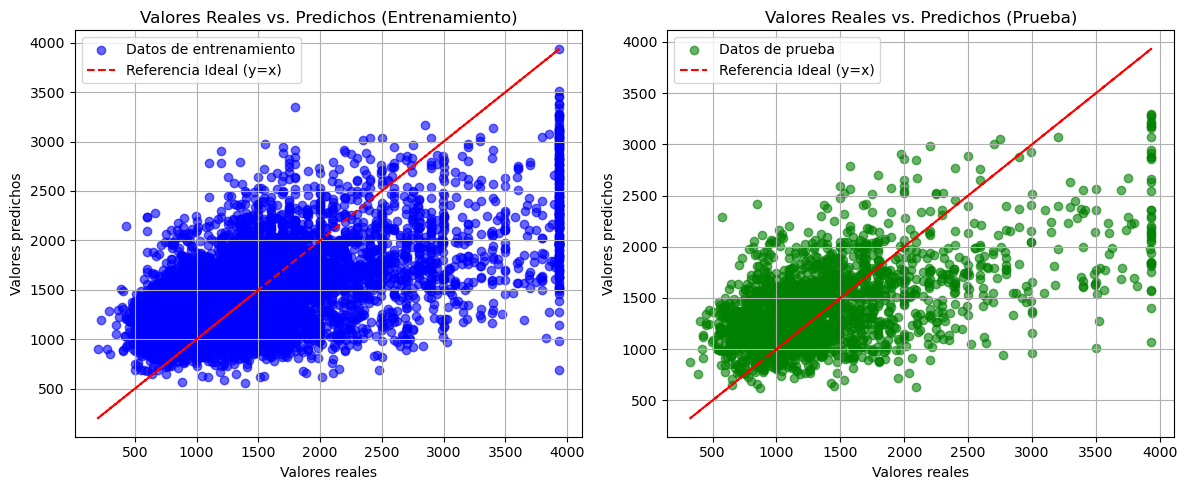

In [426]:
# Graficar valores reales vs predichos
plt.figure(figsize=(12, 5))
# Gráfico para conjunto de entrenamiento
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train1, alpha=0.6, color='blue', label="Datos de entrenamiento")
plt.plot(y_train, y_train, color='red', linestyle="--", label="Referencia Ideal (y=x)")
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.title("Valores Reales vs. Predichos (Entrenamiento)")
plt.legend()
plt.grid(True)
# Gráfico para conjunto de prueba
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test1, alpha=0.6, color='green', label="Datos de prueba")
plt.plot(y_test, y_test, color='red', linestyle="--", label="Referencia Ideal (y=x)")
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.title("Valores Reales vs. Predichos (Prueba)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

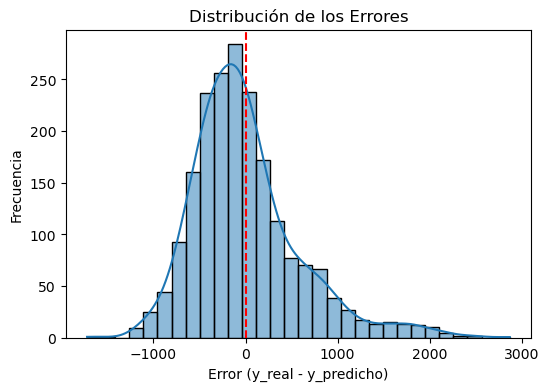

In [427]:
#Grafico de la distribucion de errores
errores1 = y_test - y_pred_test1
plt.figure(figsize=(6,4))
sns.histplot(errores1, bins=30, kde=True)
plt.axvline(0, color='red', linestyle='dashed')
plt.xlabel("Error (y_real - y_predicho)")
plt.ylabel("Frecuencia")
plt.title("Distribución de los Errores")
plt.show()

In [428]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_reset


In [429]:
# Separar la variable objetivo (precio) y las variables predictoras
X = datos_limpios[["bathrooms","bedrooms","square_feet","latitude","longitude","cityname","state","amenities_count","has_photo_Thumbnail","has_photo_Yes","pets_allowed_Cats,Dogs","pets_allowed_No","source_RentDigs.com","source_RentLingo"]]
y = datos_limpios['price']
# Dividir en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [430]:

# Agregar constante al modelo
X = sm.add_constant(X)
# Ajustar el modelo de regresión lineal
model = sm.OLS(y, X).fit()
# Aplicar el Test RESET de Ramsey
reset_test = linear_reset(model, power=2, use_f=True)
# Mostrar resultados
print(reset_test)

<F test: F=235.84589841300976, p=1.2621370134640798e-52, df_denom=9.98e+03, df_num=1>


In [432]:
#Modelo polinomico de grado 2 y estandarización de variables

In [433]:
# Separar la variable objetivo (precio) y las variables predictoras
X = datos_limpios[["bathrooms","bedrooms","square_feet","latitude","longitude","cityname","state","amenities_count","has_photo_Thumbnail","has_photo_Yes","pets_allowed_Cats,Dogs",'source_RentLingo',"source_ListedBuy",
]]
y = datos_limpios['price']

In [434]:
# Dividir en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [435]:
# Escalamiento de variables
X_scaler = StandardScaler()
y_scaler = StandardScaler()

X_train_scaled = X_scaler.fit_transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1,1)).ravel()
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1,1)).ravel()

# Generar características polinómicas
grado = 2
poly = PolynomialFeatures(degree=grado)

X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Validación cruzada con Regresión Lineal
modelo_lineal = LinearRegression()
r2_scores = cross_val_score(modelo_lineal, X_train_poly, y_train_scaled, cv=10, scoring='r2')

# Resultados de la validación cruzada
for i, r2 in enumerate(r2_scores, start=1):
    print(f"Fold {i}: R² = {r2:.4f}")

print(f"\n Promedio de R²: {np.mean(r2_scores):.4f}")
print(f" Desviación estándar de R²: {np.std(r2_scores):.4f}")

# Entrenar el modelo final
modelo_lineal.fit(X_train_poly, y_train_scaled)

# Predicciones
y_train_pred_scaled = modelo_lineal.predict(X_train_poly)
y_test_pred_scaled = modelo_lineal.predict(X_test_poly)

# Desescalar predicciones
y_train_pred = y_scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).ravel()
y_test_pred = y_scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).ravel()

# Evaluación del modelo
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

rmse_train = root_mean_squared_error(y_train, y_train_pred)
rmse_test = root_mean_squared_error(y_test, y_test_pred)

print("\n **Resultados del Modelo**")
print(f" R² en entrenamiento: {r2_train:.4f}")
print(f" R² en prueba: {r2_test:.4f}")
print(f" RMSE en entrenamiento: {rmse_train:.4f}")
print(f" RMSE en prueba: {rmse_test:.4f}")

Fold 1: R² = 0.4974
Fold 2: R² = 0.5306
Fold 3: R² = 0.5266
Fold 4: R² = 0.5314
Fold 5: R² = 0.5056
Fold 6: R² = 0.5119
Fold 7: R² = 0.4376
Fold 8: R² = 0.5000
Fold 9: R² = 0.4933
Fold 10: R² = 0.5129

 Promedio de R²: 0.5047
 Desviación estándar de R²: 0.0259

 **Resultados del Modelo**
 R² en entrenamiento: 0.5253
 R² en prueba: 0.5306
 RMSE en entrenamiento: 499.6089
 RMSE en prueba: 488.0822


In [436]:
#Modelo polinomico de grado 3 y estandarizacion de variables 

In [437]:
# Separar la variable objetivo (precio) y las variables predictoras
X = datos_limpios[["bathrooms","bedrooms","square_feet","latitude","longitude","cityname","state","amenities_count","has_photo_Thumbnail","has_photo_Yes","pets_allowed_Cats,Dogs",'source_RentLingo'
]]
y = datos_limpios['price']

In [438]:
# Dividir en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [439]:

# Escalamiento de variables
X_scaler = StandardScaler()
y_scaler = StandardScaler()

X_train_scaled = X_scaler.fit_transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1,1)).ravel()
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1,1)).ravel()

# Generar características polinómicas
grado = 3
poly = PolynomialFeatures(degree=grado)

X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Validación cruzada con Regresión Lineal
modelo_lineal = LinearRegression()
r2_scores = cross_val_score(modelo_lineal, X_train_poly, y_train_scaled, cv=10, scoring='r2')

# Resultados de la validación cruzada
for i, r2 in enumerate(r2_scores, start=1):
    print(f"Fold {i}: R² = {r2:.4f}")

print(f"\n Promedio de R²: {np.mean(r2_scores):.4f}")
print(f" Desviación estándar de R²: {np.std(r2_scores):.4f}")

# Entrenar el modelo final
modelo_lineal.fit(X_train_poly, y_train_scaled)

# Predicciones
y_train_pred_scaled = modelo_lineal.predict(X_train_poly)
y_test_pred_scaled = modelo_lineal.predict(X_test_poly)

# Desescalar predicciones
y_train_pred = y_scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).ravel()
y_test_pred = y_scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).ravel()

# Evaluación del modelo
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

rmse_train = root_mean_squared_error(y_train, y_train_pred)
rmse_test = root_mean_squared_error(y_test, y_test_pred)

print("\n **Resultados del Modelo**")
print(f" R² en entrenamiento: {r2_train:.4f}")
print(f" R² en prueba: {r2_test:.4f}")
print(f" RMSE en entrenamiento: {rmse_train:.4f}")
print(f" RMSE en prueba: {rmse_test:.4f}")

Fold 1: R² = 0.6137
Fold 2: R² = 0.5820
Fold 3: R² = 0.5854
Fold 4: R² = 0.6136
Fold 5: R² = 0.5950
Fold 6: R² = 0.5651
Fold 7: R² = 0.5244
Fold 8: R² = 0.5879
Fold 9: R² = 0.3720
Fold 10: R² = 0.6203

 Promedio de R²: 0.5659
 Desviación estándar de R²: 0.0699

 **Resultados del Modelo**
 R² en entrenamiento: 0.6512
 R² en prueba: 0.6200
 RMSE en entrenamiento: 428.2586
 RMSE en prueba: 439.1498


In [441]:
#Modelo polinomico de grado 3 con regularizacion Ridge y estandarización de variables

In [442]:
# Separar la variable objetivo (precio) y las variables predictoras
X = datos_limpios[["bathrooms","bedrooms","square_feet","latitude","longitude","cityname","state","amenities_count","has_photo_Thumbnail","has_photo_Yes","pets_allowed_Cats,Dogs","pets_allowed_No","source_RentDigs.com",	"source_RentLingo"
]]
y = datos_limpios['price']

In [443]:
# Dividir en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [445]:

# Escalamos X e Y
X_scaler3 = StandardScaler()
y_scaler3 = StandardScaler()

X_train_scaled3 = X_scaler3.fit_transform(X_train)
X_test_scaled3 = X_scaler3.transform(X_test)

y_train_scaled3 = y_scaler3.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_scaled3 = y_scaler3.transform(y_test.values.reshape(-1, 1)).ravel()

# Generamos características polinómicas
grado = 3  
poly = PolynomialFeatures(degree=grado)

X_train_poly3 = poly.fit_transform(X_train_scaled3)
X_test_poly3 = poly.transform(X_test_scaled3)

# Validación cruzada para encontrar el mejor alpha en Ridge
alpha_values3 =  np.logspace(-1, 4, 50)
best_alpha3 = None
best_score3 = float("inf")  # Queremos minimizar el RMSE, así que iniciamos con infinito

for alpha in alpha_values3:
    modelo_ridge3 = Ridge(alpha=alpha)
    scores3 = cross_val_score(modelo_ridge3, X_train_poly3, y_train_scaled3, cv=10, scoring='neg_root_mean_squared_error')
    
    mean_rmse3 = -scores3.mean()  # Convertimos a positivo porque sklearn devuelve valores negativos
    
    print(f"Alpha: {alpha}, RMSE promedio: {mean_rmse3:.4f}")
    
    if mean_rmse3 < best_score3:  # Buscamos el menor RMSE
        best_score3 = mean_rmse3
        best_alpha3 = alpha

print(f"\nMejor alpha encontrado: {best_alpha3} con RMSE: {best_score3:.4f}")

# Entrenar el modelo con el mejor alpha
modelo_final3 = Ridge(alpha=best_alpha3)
modelo_final3.fit(X_train_poly3, y_train_scaled3)

# Predicciones en entrenamiento y prueba
y_train_pred_scaled3 = modelo_final3.predict(X_train_poly3)
y_test_pred_scaled3 = modelo_final3.predict(X_test_poly3)

# Desescalar las predicciones
y_train_pred3 = y_scaler3.inverse_transform(y_train_pred_scaled3.reshape(-1, 1)).ravel()
y_test_pred3 = y_scaler3.inverse_transform(y_test_pred_scaled3.reshape(-1, 1)).ravel()

# Calcular R² en entrenamiento y prueba
r2_train3 = r2_score(y_train, y_train_pred3)
r2_test3 = r2_score(y_test, y_test_pred3)

# Calcular RMSE
rmse_train3 = root_mean_squared_error(y_train, y_train_pred3)
rmse_test3 = root_mean_squared_error(y_test, y_test_pred3)

# Calcular MAPE evitando división por cero
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / np.maximum(y_true, 1e-10))) * 100

mape_train3 = mean_absolute_percentage_error(y_train, y_train_pred3)
mape_test3 = mean_absolute_percentage_error(y_test, y_test_pred3)

# Imprimir resultados
print(f"R² en entrenamiento: {r2_train3:.4f}")
print(f"R² en prueba: {r2_test3:.4f}")
print(f"RMSE en entrenamiento: {rmse_train3:.4f}")
print(f"RMSE en prueba: {rmse_test3:.4f}")
print(f"MAPE en entrenamiento: {mape_train3:.2f}%")
print(f"MAPE en prueba: {mape_test3:.2f}%")
# Obtener coeficientes
coeficientes3 = modelo_final3.coef_
nombres_features3 = poly.get_feature_names_out()



Alpha: 0.1, RMSE promedio: 0.6667
Alpha: 0.12648552168552962, RMSE promedio: 0.6659
Alpha: 0.15998587196060582, RMSE promedio: 0.6651
Alpha: 0.20235896477251572, RMSE promedio: 0.6645
Alpha: 0.2559547922699536, RMSE promedio: 0.6639
Alpha: 0.3237457542817644, RMSE promedio: 0.6634
Alpha: 0.40949150623804254, RMSE promedio: 0.6629
Alpha: 0.5179474679231212, RMSE promedio: 0.6625
Alpha: 0.655128556859551, RMSE promedio: 0.6620
Alpha: 0.8286427728546845, RMSE promedio: 0.6615
Alpha: 1.0481131341546859, RMSE promedio: 0.6610
Alpha: 1.3257113655901096, RMSE promedio: 0.6604
Alpha: 1.6768329368110082, RMSE promedio: 0.6597
Alpha: 2.1209508879201904, RMSE promedio: 0.6590
Alpha: 2.682695795279726, RMSE promedio: 0.6582
Alpha: 3.39322177189533, RMSE promedio: 0.6573
Alpha: 4.291934260128778, RMSE promedio: 0.6563
Alpha: 5.428675439323859, RMSE promedio: 0.6552
Alpha: 6.8664884500430015, RMSE promedio: 0.6541
Alpha: 8.685113737513529, RMSE promedio: 0.6528
Alpha: 10.985411419875584, RMSE promed

In [446]:
print(f"\nMejor alpha encontrado: {best_alpha3}")


Mejor alpha encontrado: 471.48663634573944


In [447]:
print(f"R² en entrenamiento: {r2_train3:.4f}")
print(f"R² en prueba: {r2_test3:.4f}")
print(f"RMSE en entrenamiento: {rmse_train3:.4f}")
print(f"RMSE en prueba: {rmse_test3:.4f}")

R² en entrenamiento: 0.6541
R² en prueba: 0.6254
RMSE en entrenamiento: 426.4926
RMSE en prueba: 436.0153


In [448]:
#validación cruzada de 10 folds con impresión de los valores R2 ndividuales, su promedio y desviación estándar.

In [449]:
# Escalar X e Y
X_scaler3 = StandardScaler()
y_scaler3 = StandardScaler()
X_train_scaled3 = X_scaler3.fit_transform(X_train)
X_test_scaled3 = X_scaler3.transform(X_test)
y_train_scaled3 = y_scaler3.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_scaled3 = y_scaler3.transform(y_test.values.reshape(-1, 1)).ravel()

# Generar características polinómicas
gradu = 3  # Grado del polinomio
poly = PolynomialFeatures(degree=gradu)

X_train_poly3 = poly.fit_transform(X_train_scaled3)
X_test_poly3 = poly.transform(X_test_scaled3)

# Definir el alpha específico teniendo en cuenta que ya encontramos el mejor
alpha_fijo = 471.48663634573944
# Crear modelo Ridge con alpha=100
modelo_ridge_cv = Ridge(alpha=alpha_fijo)

# Realizar validación cruzada y obtener los R² individuales
r2_scores_cv = cross_val_score(modelo_ridge_cv, X_train_poly3, y_train_scaled3, cv=10, scoring='r2')

# Imprimir cada R² obtenido en cada iteración de la validación cruzada
for i, r2 in enumerate(r2_scores_cv, start=1):
    print(f"Fold {i}: R² = {r2:.4f}")

# Imprimir promedio y desviación estándar de los R²
print(f"\nPromedio de R²: {np.mean(r2_scores_cv):.4f}")
print(f"Desviación estándar de R²: {np.std(r2_scores_cv):.4f}")


Fold 1: R² = 0.6165
Fold 2: R² = 0.6279
Fold 3: R² = 0.6180
Fold 4: R² = 0.6226
Fold 5: R² = 0.5972
Fold 6: R² = 0.6150
Fold 7: R² = 0.5497
Fold 8: R² = 0.6109
Fold 9: R² = 0.5285
Fold 10: R² = 0.6484

Promedio de R²: 0.6035
Desviación estándar de R²: 0.0348


In [450]:
# Obtener coeficientes y nombres de características del modelo polinomial de grado tres 
coeficientes_polinomicos3 = modelo_final3.coef_
nombres_caracteristicas3 = poly.get_feature_names_out(input_features=X_train.columns)

# Crear un DataFrame con términos y coeficientes
df_coef = pd.DataFrame({"Término": nombres_caracteristicas3, "Coeficiente": coeficientes_polinomicos3})

# Ordenar por magnitud del coeficiente para ver los más importantes
df_coef["Coeficiente_abs"] = df_coef["Coeficiente"].abs()
df_coef = df_coef.sort_values(by="Coeficiente_abs", ascending=False).drop(columns=["Coeficiente_abs"])

# Mostrar coeficientes ordenados
print("\nCoeficientes del Modelo Polinómico con Ridge:")
print(df_coef.to_string(index=False))


Coeficientes del Modelo Polinómico con Ridge:
                                                       Término  Coeficiente
                                                   longitude^2     0.351924
                                             longitude state^2    -0.181079
                                             longitude^2 state    -0.168096
                                                       state^2     0.120661
                                          bedrooms square_feet    -0.094382
                                          latitude^2 longitude     0.093868
                                                       state^3     0.080839
                                          latitude longitude^2     0.072309
                                              latitude state^2    -0.070068
                                         square_feet longitude    -0.063555
                          square_feet pets_allowed_Cats,Dogs^2     0.058509
                                         

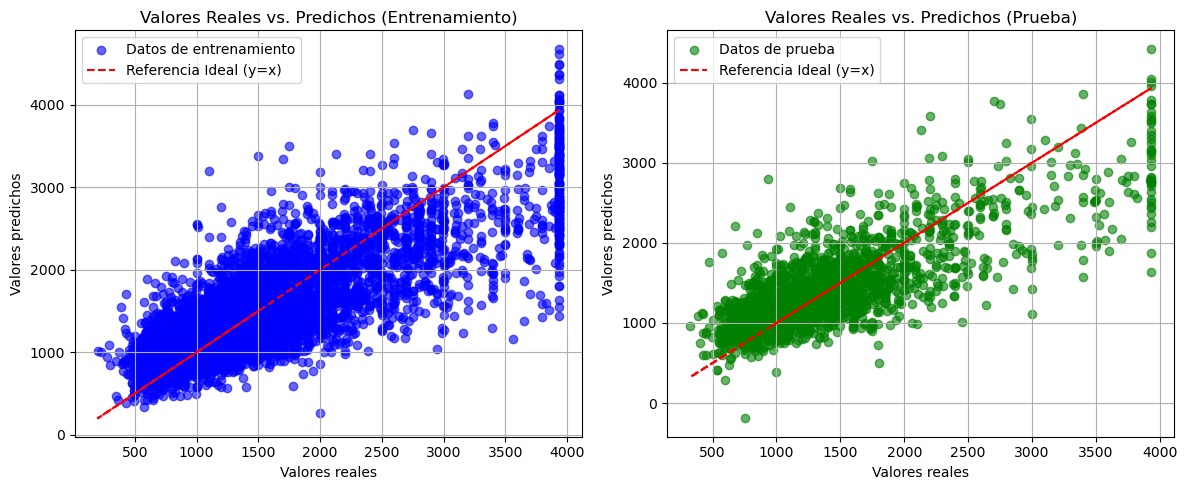

In [451]:
# Graficar valores reales vs predichos
plt.figure(figsize=(12, 5))

# Gráfico para conjunto de entrenamiento
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred3, alpha=0.6, color='blue', label="Datos de entrenamiento")
plt.plot(y_train, y_train, color='red', linestyle="--", label="Referencia Ideal (y=x)")
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.title("Valores Reales vs. Predichos (Entrenamiento)")
plt.legend()
plt.grid(True)

# Gráfico para conjunto de prueba
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred3, alpha=0.6, color='green', label="Datos de prueba")
plt.plot(y_test, y_test, color='red', linestyle="--", label="Referencia Ideal (y=x)")
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.title("Valores Reales vs. Predichos (Prueba)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


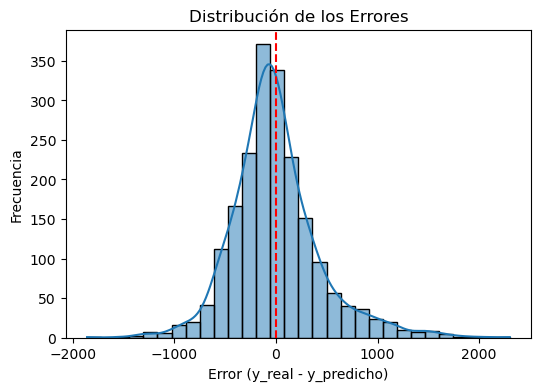

In [452]:
#Graficar la distribución de los errores
errores3 = y_test - y_test_pred3
plt.figure(figsize=(6,4))
sns.histplot(errores3, bins=30, kde=True)
plt.axvline(0, color='red', linestyle='dashed')
plt.xlabel("Error (y_real - y_predicho)")
plt.ylabel("Frecuencia")
plt.title("Distribución de los Errores")
plt.show()

In [ ]:
#Modelo polinomico de grado 3 con regularizacion Ridge y estandarización de variables teniendo en cuenta variables adicionales con respecto al modelo anterior 

In [453]:
# Separar la variable objetivo (precio) y las variables predictoras
X = datos_limpios[["latitude","longitude","bathrooms","bedrooms","square_feet","cityname","state",'amenities_count', 'pets_allowed_Cats,Dogs', 'pets_allowed_No', 'source_ListedBuy', 'source_RentDigs.com', 'source_RentLingo',"source_Listanza","has_photo_Thumbnail","has_photo_Yes","category_housing/rent/home","category_housing/rent/short_term"
]]
y = datos_limpios['price']

In [454]:
# Dividir en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [455]:
# Escalamos X e Y
X_scaler3 = StandardScaler()
y_scaler3 = StandardScaler()

X_train_scaled3 = X_scaler3.fit_transform(X_train)
X_test_scaled3 = X_scaler3.transform(X_test)

y_train_scaled3 = y_scaler3.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_scaled3 = y_scaler3.transform(y_test.values.reshape(-1, 1)).ravel()

# Generamos características polinómicas
grado = 3  
poly = PolynomialFeatures(degree=grado)

X_train_poly3 = poly.fit_transform(X_train_scaled3)
X_test_poly3 = poly.transform(X_test_scaled3)

# Validación cruzada para encontrar el mejor alpha en Ridge
alpha_values3 =  np.logspace(-1, 4, 50)
best_alpha3 = None
best_score3 = float("inf")  # Queremos minimizar el RMSE, así que iniciamos con infinito

for alpha in alpha_values3:
    modelo_ridge3 = Ridge(alpha=alpha)
    scores3 = cross_val_score(modelo_ridge3, X_train_poly3, y_train_scaled3, cv=10, scoring='neg_root_mean_squared_error')
    
    mean_rmse3 = -scores3.mean()  # Convertimos a positivo porque sklearn devuelve valores negativos
    
    print(f"Alpha: {alpha}, RMSE promedio: {mean_rmse3:.4f}")
    
    if mean_rmse3 < best_score3:  # Buscamos el menor RMSE
        best_score3 = mean_rmse3
        best_alpha3 = alpha

print(f"\nMejor alpha encontrado: {best_alpha3} con RMSE: {best_score3:.4f}")

# Entrenar el modelo con el mejor alpha
modelo_final3 = Ridge(alpha=best_alpha3)
modelo_final3.fit(X_train_poly3, y_train_scaled3)

# Predicciones en entrenamiento y prueba
y_train_pred_scaled3 = modelo_final3.predict(X_train_poly3)
y_test_pred_scaled3 = modelo_final3.predict(X_test_poly3)

# Desescalar las predicciones
y_train_pred3 = y_scaler3.inverse_transform(y_train_pred_scaled3.reshape(-1, 1)).ravel()
y_test_pred3 = y_scaler3.inverse_transform(y_test_pred_scaled3.reshape(-1, 1)).ravel()

# Calcular R² en entrenamiento y prueba
r2_train3 = r2_score(y_train, y_train_pred3)
r2_test3 = r2_score(y_test, y_test_pred3)

# Calcular RMSE
rmse_train3 = root_mean_squared_error(y_train, y_train_pred3)
rmse_test3 = root_mean_squared_error(y_test, y_test_pred3)

# Calcular MAPE evitando división por cero
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / np.maximum(y_true, 1e-10))) * 100

mape_train3 = mean_absolute_percentage_error(y_train, y_train_pred3)
mape_test3 = mean_absolute_percentage_error(y_test, y_test_pred3)

# Imprimir resultados
print(f"R² en entrenamiento: {r2_train3:.4f}")
print(f"R² en prueba: {r2_test3:.4f}")
print(f"RMSE en entrenamiento: {rmse_train3:.4f}")
print(f"RMSE en prueba: {rmse_test3:.4f}")
print(f"MAPE en entrenamiento: {mape_train3:.2f}%")
print(f"MAPE en prueba: {mape_test3:.2f}%")
# Obtener coeficientes
coeficientes3 = modelo_final3.coef_
nombres_features3 = poly.get_feature_names_out()



Alpha: 0.1, RMSE promedio: 0.7127
Alpha: 0.12648552168552962, RMSE promedio: 0.7087
Alpha: 0.15998587196060582, RMSE promedio: 0.7049
Alpha: 0.20235896477251572, RMSE promedio: 0.7015
Alpha: 0.2559547922699536, RMSE promedio: 0.6983
Alpha: 0.3237457542817644, RMSE promedio: 0.6954
Alpha: 0.40949150623804254, RMSE promedio: 0.6927
Alpha: 0.5179474679231212, RMSE promedio: 0.6902
Alpha: 0.655128556859551, RMSE promedio: 0.6878
Alpha: 0.8286427728546845, RMSE promedio: 0.6856
Alpha: 1.0481131341546859, RMSE promedio: 0.6834
Alpha: 1.3257113655901096, RMSE promedio: 0.6814
Alpha: 1.6768329368110082, RMSE promedio: 0.6794
Alpha: 2.1209508879201904, RMSE promedio: 0.6776
Alpha: 2.682695795279726, RMSE promedio: 0.6759
Alpha: 3.39322177189533, RMSE promedio: 0.6743
Alpha: 4.291934260128778, RMSE promedio: 0.6728
Alpha: 5.428675439323859, RMSE promedio: 0.6714
Alpha: 6.8664884500430015, RMSE promedio: 0.6700
Alpha: 8.685113737513529, RMSE promedio: 0.6686
Alpha: 10.985411419875584, RMSE promed

In [456]:
print(f"\nMejor alpha encontrado: {best_alpha3}")


Mejor alpha encontrado: 596.3623316594643


In [457]:
print(f"R² en entrenamiento: {r2_train3:.4f}")
print(f"R² en prueba: {r2_test3:.4f}")
print(f"RMSE en entrenamiento: {rmse_train3:.4f}")
print(f"RMSE en prueba: {rmse_test3:.4f}")

R² en entrenamiento: 0.6578
R² en prueba: 0.6218
RMSE en entrenamiento: 424.2394
RMSE en prueba: 438.0729


In [458]:
# Escalar X e Y
X_scaler3 = StandardScaler()
y_scaler3 = StandardScaler()
X_train_scaled3 = X_scaler3.fit_transform(X_train)
X_test_scaled3 = X_scaler3.transform(X_test)
y_train_scaled3 = y_scaler3.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_scaled3 = y_scaler3.transform(y_test.values.reshape(-1, 1)).ravel()

# Generar características polinómicas
gradu = 3  # Grado del polinomio
poly = PolynomialFeatures(degree=gradu)

X_train_poly3 = poly.fit_transform(X_train_scaled3)
X_test_poly3 = poly.transform(X_test_scaled3)

# Definir el alpha específico teniendo en cuenta que ya encontramos el mejor
alpha_fijo = 596.3623316594643
# Crear modelo Ridge con alpha=100
modelo_ridge_cv = Ridge(alpha=alpha_fijo)

# Realizar validación cruzada y obtener los R² individuales
r2_scores_cv = cross_val_score(modelo_ridge_cv, X_train_poly3, y_train_scaled3, cv=10, scoring='r2')

# Imprimir cada R² obtenido en cada iteración de la validación cruzada
for i, r2 in enumerate(r2_scores_cv, start=1):
    print(f"Fold {i}: R² = {r2:.4f}")

# Imprimir promedio y desviación estándar de los R²
print(f"\nPromedio de R²: {np.mean(r2_scores_cv):.4f}")
print(f"Desviación estándar de R²: {np.std(r2_scores_cv):.4f}")


Fold 1: R² = 0.6104
Fold 2: R² = 0.5952
Fold 3: R² = 0.6169
Fold 4: R² = 0.5949
Fold 5: R² = 0.5953
Fold 6: R² = 0.6032
Fold 7: R² = 0.5372
Fold 8: R² = 0.5865
Fold 9: R² = 0.4931
Fold 10: R² = 0.6428

Promedio de R²: 0.5875
Desviación estándar de R²: 0.0404


In [459]:
# Obtener coeficientes y nombres de características del modelo polinomial de grado tres 
coeficientes_polinomicos3 = modelo_final3.coef_
nombres_caracteristicas3 = poly.get_feature_names_out(input_features=X_train.columns)

# Crear un DataFrame con términos y coeficientes
df_coef = pd.DataFrame({"Término": nombres_caracteristicas3, "Coeficiente": coeficientes_polinomicos3})

# Ordenar por magnitud del coeficiente para ver los más importantes
df_coef["Coeficiente_abs"] = df_coef["Coeficiente"].abs()
df_coef = df_coef.sort_values(by="Coeficiente_abs", ascending=False).drop(columns=["Coeficiente_abs"])

# Mostrar coeficientes ordenados
print("\nCoeficientes del Modelo Polinómico con Ridge:")
print(df_coef.to_string(index=False))


Coeficientes del Modelo Polinómico con Ridge:
                                                                           Término   Coeficiente
                                                                       longitude^2  3.319238e-01
                                                                 longitude state^2 -1.718294e-01
                                                                 longitude^2 state -1.639762e-01
                                                                           state^2  1.106950e-01
                                                              latitude^2 longitude  9.428374e-02
                                                              bedrooms square_feet -8.627436e-02
                                                              latitude longitude^2  7.658403e-02
                                                                           state^3  6.828535e-02
                                                                   longitude sta